# **Fashion MNIST Classification**

## Imports
___

In [3]:
# path and os packages and setup (if needed)


# external packages and apis
import tensorflow
from tensorflow import keras
#import matplotlib.pyplot as plt
#from keras.api._v2.keras import activations
#from scipy import ndimage
import numpy as np
from keras.models import load_model

# developed packages


# packages setup (if needed)



## ETL
___

In [4]:
dataset = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()
#X_train.shape #60k imgs with 28px x 28px

# Labels
y_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'bag',
    9: 'Ankle boot'
}

In [5]:
X_train.shape


(60000, 28, 28)

## Data Viz
___

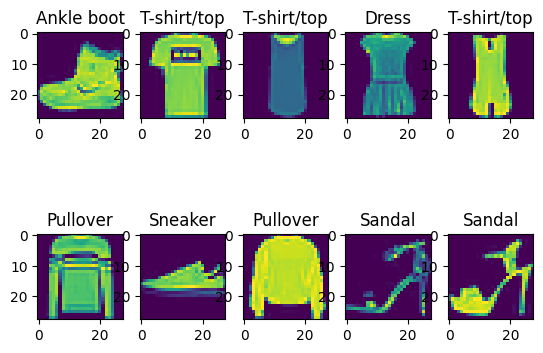

In [3]:
for img in range(10):
  plt.subplot(2, 5, img+1)
  plt.imshow(X_train[img])
  plt.title(y_labels[y_train[img]])


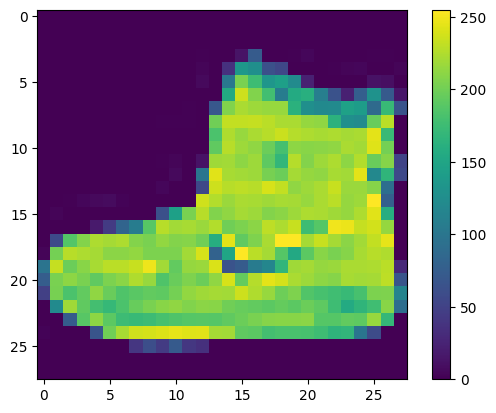

In [4]:
plt.imshow(X_train[0])
plt.colorbar()

## Model Design
___

In [5]:
# Model def and creation
# Model = Sequence(Input -> Processing -> Output)
X_train = X_train/float(255) # normalization
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28, 28)), # input layer
        keras.layers.Dense(256, activation=tensorflow.nn.relu), # 256 = nunber of nodes and ReLU (non linear function) as the activation function  # processing layer (Hidden layers)
        keras.layers.Dropout(0.2), # turn 20% of nodes to "standby"
        #keras.layers.Dense(128, activation=tensorflow.nn.relu),
        #keras.layers.Dense(64, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax) # output layer
    ]
)

# Before we fit our model, we need to compile it
# adam is the most recommended optimizer for classifications w/ labels>2 and sperse categorical crossentropy for measure the loss
adam = keras.optimizers.Adam(learning_rate=0.002)
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
]

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] # metric to measure the model performance
)
hist = model.fit(
    X_train, y_train,
    batch_size=480,
    epochs=5, # something like cvs in sklearn
    validation_split=.2, # % for model validation
    callbacks=callbacks
) # same as sklearn models syntax


Epoch 1/5
100/100 [==============================] - 6s 42ms/step - loss: 0.6508 - accuracy: 0.7692 - val_loss: 0.4563 - val_accuracy: 0.8418
Epoch 2/5
100/100 [==============================] - 5s 46ms/step - loss: 0.4324 - accuracy: 0.8484 - val_loss: 0.4097 - val_accuracy: 0.8548
Epoch 3/5
100/100 [==============================] - 2s 23ms/step - loss: 0.3917 - accuracy: 0.8599 - val_loss: 0.3728 - val_accuracy: 0.8673
Epoch 4/5
100/100 [==============================] - 2s 20ms/step - loss: 0.3624 - accuracy: 0.8714 - val_loss: 0.3587 - val_accuracy: 0.8729
Epoch 5/5
100/100 [==============================] - 2s 20ms/step - loss: 0.3460 - accuracy: 0.8743 - val_loss: 0.3503 - val_accuracy: 0.8732


## Model Summary
___

In [6]:
# Model summary
model_summary = model.summary()
model_summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Weights
DenseLayer_Weights = model.layers[1].get_weights()[0]
DenseLayer_WeightsZeros = np.zeros(DenseLayer_Weights.shape)
DenseLayer_WeightsRandom = np.random.rand(DenseLayer_Weights.shape[0], DenseLayer_Weights.shape[1])

# Bias
DenseLayer_Bias = model.layers[1].get_weights()[1]
DenseLayer_BiasZeros = np.zeros(DenseLayer_Bias.shape)

# Testing different weights and bias
#model.layers[1].set_weights([DenseLayer_WeightsZeros, DenseLayer_Bias])
#model.layers[1].set_weights([DenseLayer_WeightsRandom, DenseLayer_Bias])
#model.layers[1].set_weights([DenseLayer_WeightsZeros, DenseLayer_BiasZeros])
#model.layers[1].set_weights([DenseLayer_WeightsRandom, DenseLayer_BiasZeros])


In [8]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

## Model Test and Evaluation
___

In [9]:
# lets test our model performance on the test dataset
y_pred = model.predict(X_test)
print(f"\nPREDICTION SAMPLE\nPredicted label: {y_labels[np.argmax(y_pred[0])]}\nReal label: {y_labels[y_test[0]]}")

313/313 [==============================] - 1s 3ms/step

PREDICTION SAMPLE
Predicted label: Ankle boot
Real label: Ankle boot


In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Performance\nLoss: {loss}\nAccuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 55.3635 - accuracy: 0.8485
Model Performance
Loss: 55.363548278808594
Accuracy: 0.8485000133514404


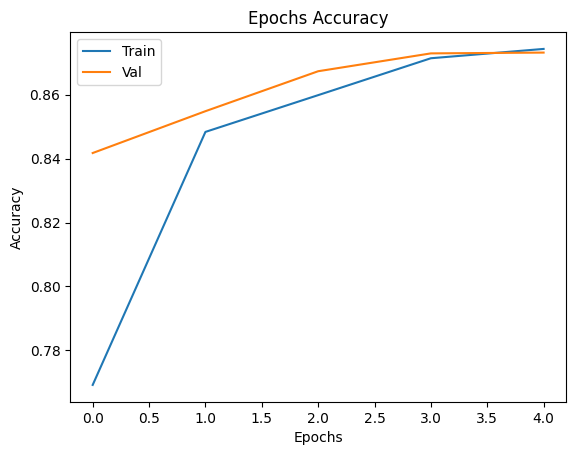

In [11]:
# Accuracy plot per evaluation epoch
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Epochs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])

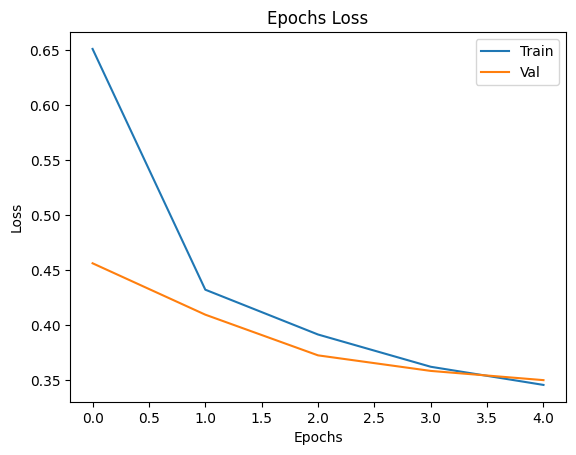

In [12]:
# Loss plot per evaluation epoch
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Epochs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

## Save and Load Model

In [13]:
model.save('fmnist_model.keras')
#loaded_model = load_model('fminist_model.keras')